<a href="https://colab.research.google.com/github/HazarKnt/Film-neri-AgProgramlama-/blob/main/Film_%C3%B6nerisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # Model seçimi,eğitim ve test verilerini ayırmak için kütüphane importu
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #sınıflandırma algoritmaları
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm #SVM(Support Vector Machine)
from sklearn import tree #Decision Tree
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve, auc #performans metrikleri
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_confusion_matrix
# karmaşıklıkları kullanarak değerlendirme metriclerini hesaplamak
import seaborn as sn # görselleştirmek için kullanılan kütüphane

In [ ]:
data = pd.read_csv('NetflixOriginals.csv',encoding='Latin1')

In [ ]:
data.head() #ilk 5 satırı

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
data.tail() #son 5 satırı

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [ ]:
data.shape #satır ve sütun sayısı

(584, 6)

In [ ]:
#hangi dilde kaç tane var
data_languages = data['Language'].str.split('/', expand=True).stack().reset_index(level=1, drop=True).to_frame('Language')

pivot_table = data_languages.pivot_table(index=None, columns='Language', aggfunc='size', fill_value=0)
print(pivot_table)

Language
Akan            1
Arabic          1
Basque          1
Bengali         1
Catalan         1
Dutch           3
English       422
Filipino        2
French         21
Georgian        1
German          5
Hindi          35
Indonesian      9
Italian        14
Japanese        8
Khmer           1
Korean          7
Malay           1
Mandarin        3
Marathi         3
Norwegian       1
Polish          3
Portuguese     12
Russian         2
Spanish        39
Swedish         2
Taiwanese       1
Tamil           1
Thai            2
Thia            1
Turkish         5
Ukranian        1
dtype: int64


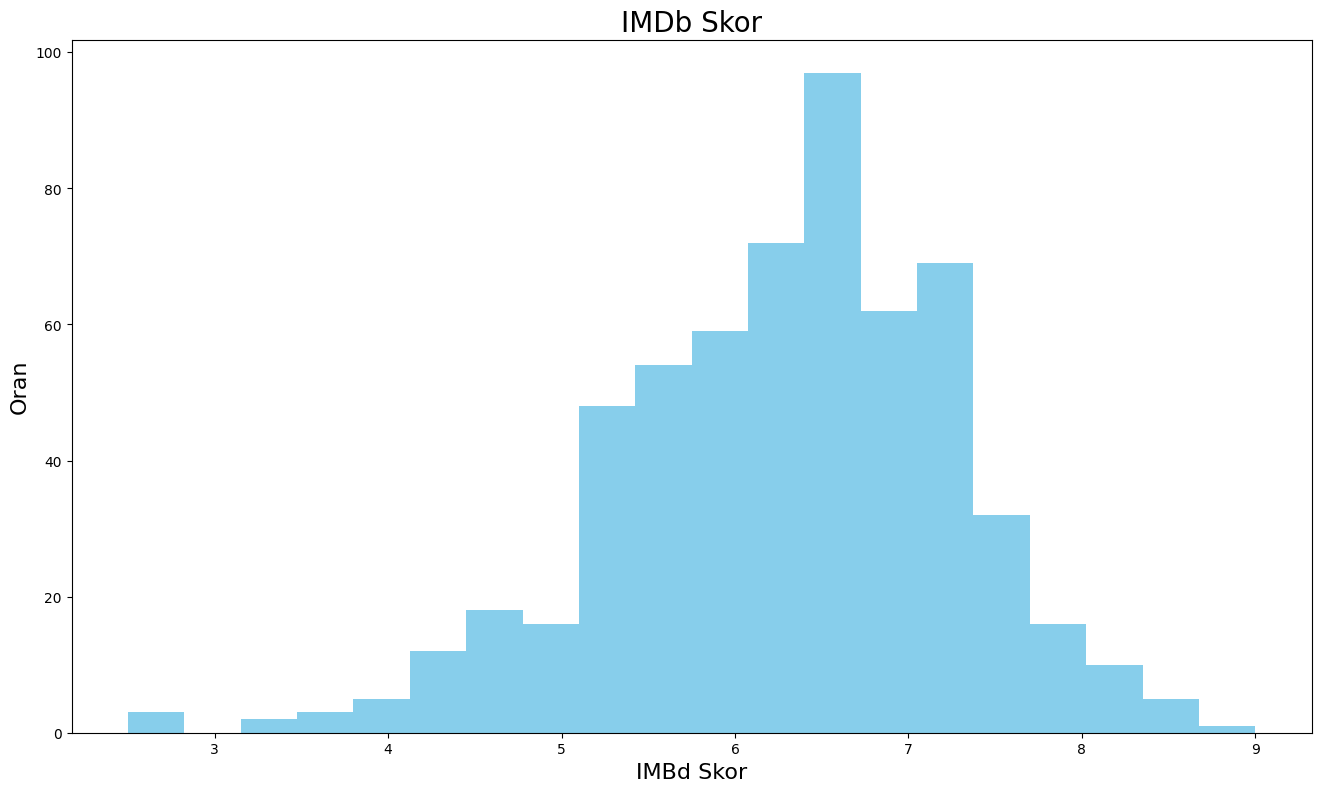

In [ ]:
plt.figure(figsize=(16,9))
plt.hist(x=data['IMDB Score'],bins=20,color="skyblue")
plt.title("IMDb Skor",fontsize=20)
plt.xlabel("IMBd Skor",fontsize=16)
plt.ylabel("Oran",fontsize=16)
plt.show()

In [ ]:
#imdb sıralamasına göre
sorted_data = data.sort_values(by='IMDB Score', ascending=False)

# İlk 10 filmi göster
top_10 = sorted_data.head(10)
print(top_10)

                                           Title  \
583     David Attenborough: A Life on Our Planet   
582    Emicida: AmarElo - It's All For Yesterday   
581                      Springsteen on Broadway   
580  Winter on Fire: Ukraine's Fight for Freedom   
579        Taylor Swift: Reputation Stadium Tour   
578   Ben Platt: Live from Radio City Music Hall   
577                       Dancing with the Birds   
576                      Cuba and the Cameraman    
573                                        Klaus   
571                                         13th   

                                    Genre           Premiere  Runtime  \
583                           Documentary    October 4, 2020       83   
582                           Documentary   December 8, 2020       89   
581                          One-man show  December 16, 2018      153   
580                           Documentary    October 9, 2015       91   
579                          Concert Film  December 31, 2018  

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Film veri setini yükle
data = pd.read_csv('NetflixOriginals.csv',encoding='Latin1')

# Genre sütununu kullanarak one-hot encoding yap
genres = data['Genre'].str.get_dummies(sep='/')

# Benzerlik matrisini oluştur
similarity_matrix = cosine_similarity(genres)

# Boş bir graf oluştur
G = nx.Graph()

# Her bir film için düğüm ekle
for index, film in data.iterrows():
    G.add_node(film["Title"])

# Benzerlik matrisindeki değerlere göre ilişki ekle
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.5:  # Benzerlik eşik değeri
            G.add_edge(data.iloc[i]["Title"], data.iloc[j]["Title"], weight=similarity)

def get_recommendations(movie_title, G, data):
    similar_movies = []
    for node in G.neighbors(movie_title):
        similar_movies.append((node, data.loc[data["Title"] == node, "IMDB Score"].values[0]))
    similar_movies.sort(key=lambda x: x[1], reverse=True)  # IMDb puanına göre sırala
    return similar_movies

def get_user_input():
    return input("Beğendiğiniz bir film veya izlediğiniz bir filmi girin: ")

def display_recommendations(recommendations):
    print("Önerilen Filmler:")
    for movie, score in recommendations:
        print(f"{movie} - IMDb Puanı: {score}")

# Kullanıcıdan film girdisini al
movie_title = get_user_input()

# Öneri yap ve göster
recommendations = get_recommendations(movie_title, G, data)
display_recommendations(recommendations)

Beğendiğiniz bir film veya izlediğiniz bir filmi girin: Mercy
Önerilen Filmler:
Raat Akeli Hai - IMDb Puanı: 7.3
AK vs AK - IMDb Puanı: 6.9
Calibre - IMDb Puanı: 6.8
His House - IMDb Puanı: 6.5
ARQ - IMDb Puanı: 6.4
Fractured - IMDb Puanı: 6.4
The Occupant - IMDb Puanı: 6.4
Time to Hunt - IMDb Puanı: 6.3
In the Shadow of the Moon - IMDb Puanı: 6.2
Lost Bullet - IMDb Puanı: 6.2
Offering to the Storm - IMDb Puanı: 6.2
Unknown Origins - IMDb Puanı: 6.1
iBoy - IMDb Puanı: 6.0
A Fall from Grace - IMDb Puanı: 5.9
The Decline - IMDb Puanı: 5.9
Extinction - IMDb Puanı: 5.8
I Am All Girls - IMDb Puanı: 5.8
TAU - IMDb Puanı: 5.8
Prime Time - IMDb Puanı: 5.7
Velvet Buzzsaw - IMDb Puanı: 5.7
Hold the Dark - IMDb Puanı: 5.6
The Paramedic - IMDb Puanı: 5.6
Dead Kids - IMDb Puanı: 5.5
Red Dot - IMDb Puanı: 5.5
Guilty - IMDb Puanı: 5.4
Dangerous Lies - IMDb Puanı: 5.3
Intuition - IMDb Puanı: 5.3
The Most Assassinated Woman in the World - IMDb Puanı: 5.3
Clinical - IMDb Puanı: 5.1
Rebirth - IMDb Puanı:

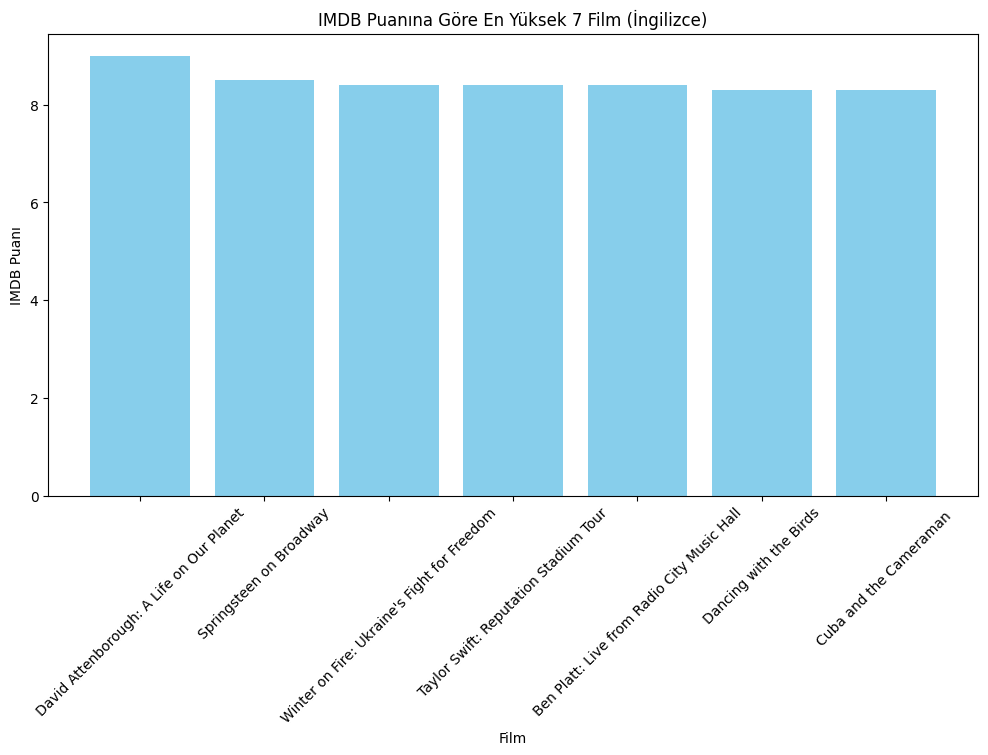

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# NetflixOriginals.csv dosyasını Latin1 encoding ile oku
data = pd.read_csv('NetflixOriginals.csv', encoding='Latin1')

# Aynı dilde olan filmleri seçin
same_language_films = data[data['Language'].str.contains('English')]

# IMDb puanına göre sıralayın
same_language_films_sorted = same_language_films.sort_values(by='IMDB Score', ascending=False)

# En yüksek 7 filmi seçin
top_7_films = same_language_films_sorted.head(7)

# Grafik çizin
plt.figure(figsize=(12, 6))
plt.bar(top_7_films['Title'], top_7_films['IMDB Score'], color='skyblue')
plt.xlabel('Film')
plt.ylabel('IMDB Puanı')
plt.title('IMDB Puanına Göre En Yüksek 7 Film (İngilizce)')
plt.xticks(rotation=45)
plt.show()


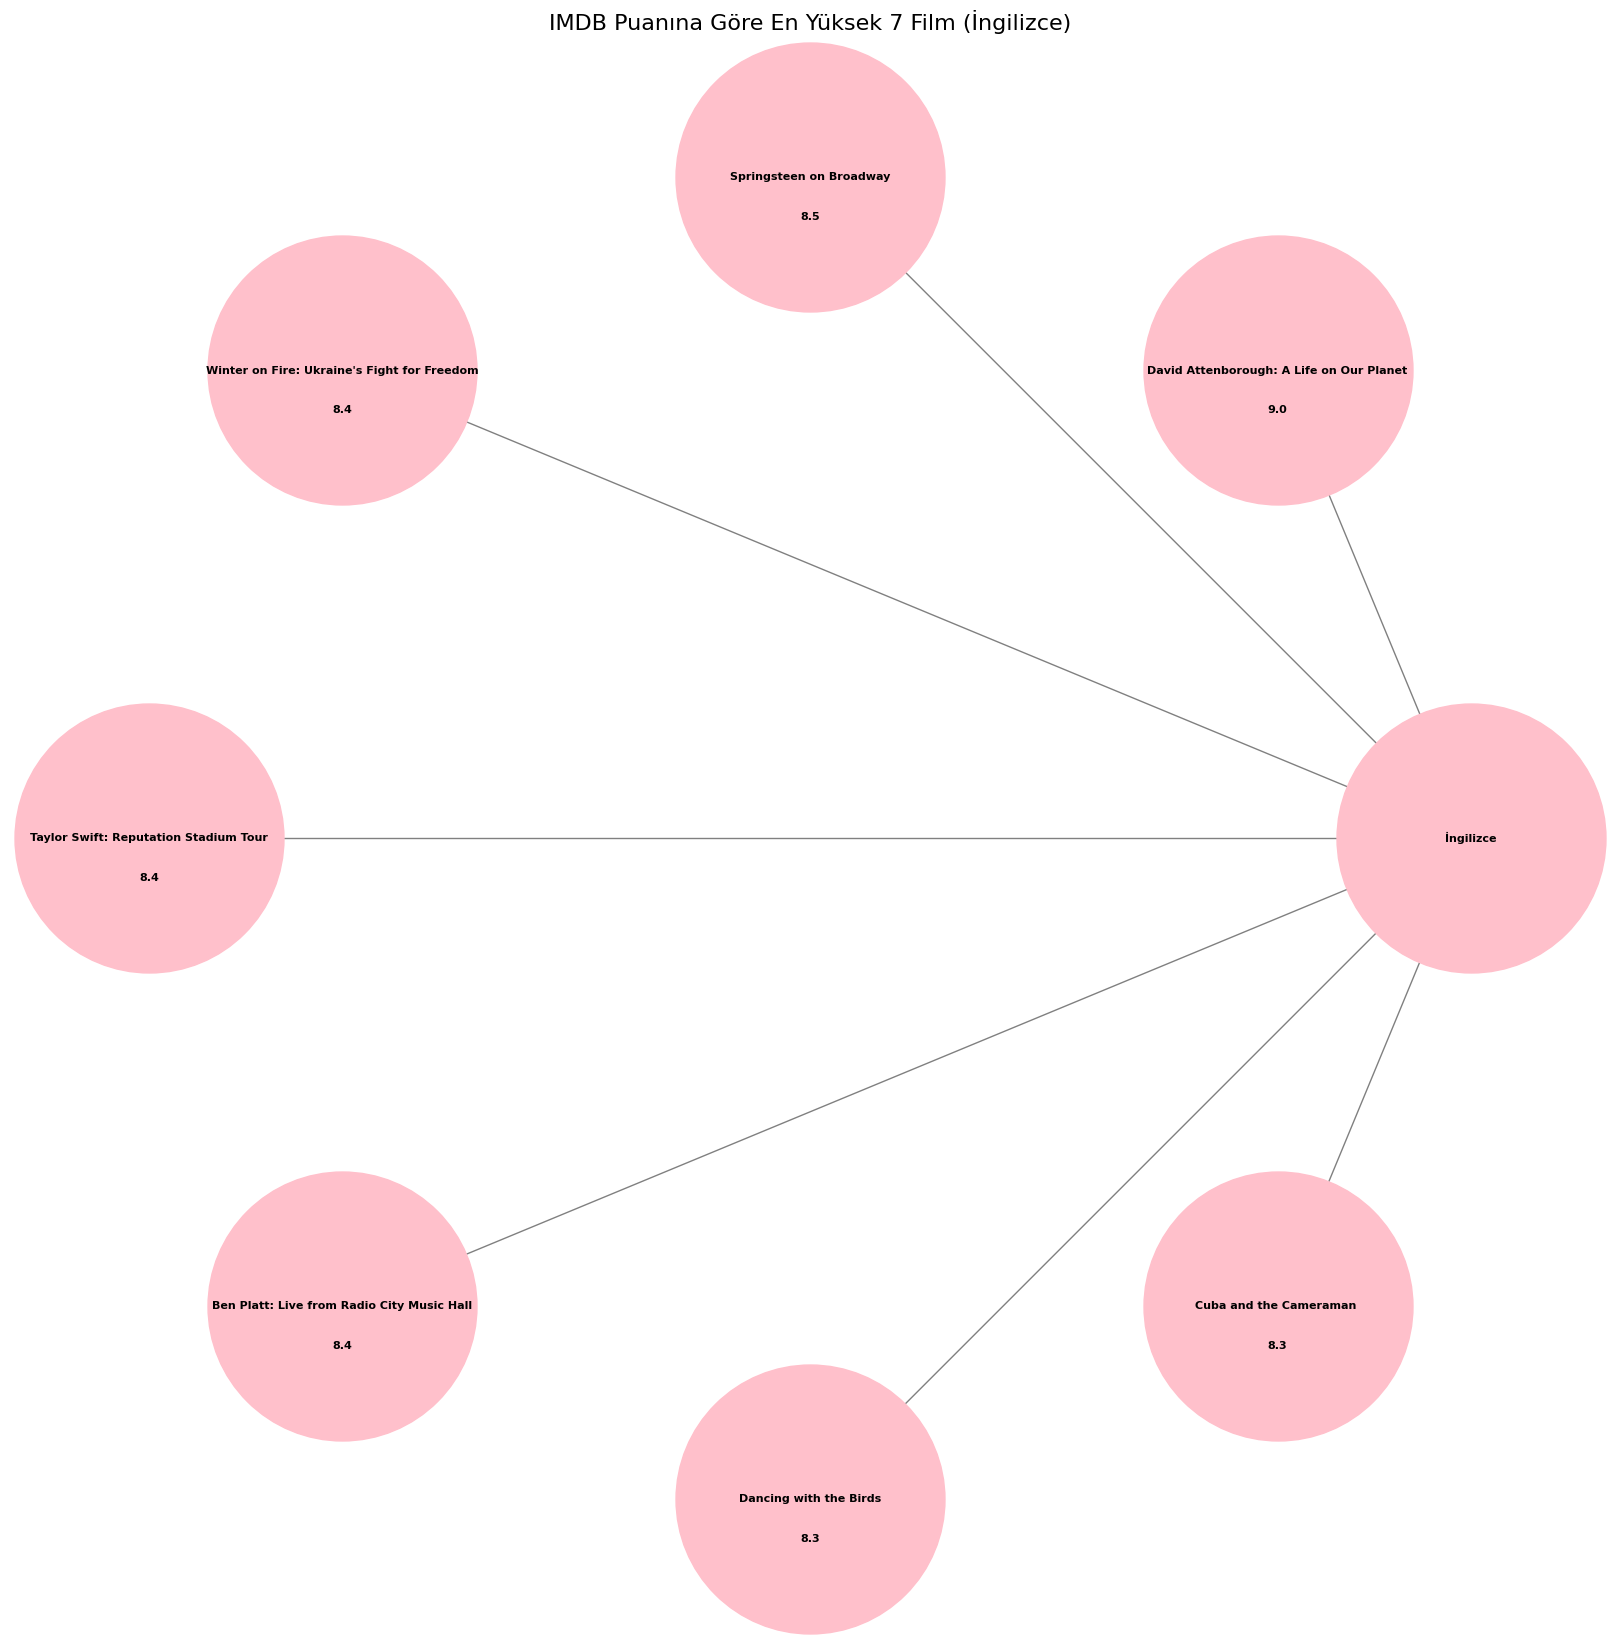

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# NetflixOriginals.csv dosyasını Latin1 encoding ile oku
data = pd.read_csv('NetflixOriginals.csv', encoding='Latin1')

# Aynı dilde olan filmleri seçin
same_language_films = data[data['Language'].str.contains('English')]

# IMDb puanına göre sıralayın
same_language_films_sorted = same_language_films.sort_values(by='IMDB Score', ascending=False)

# En yüksek 7 filmi seçin
top_7_films = same_language_films_sorted.head(7)

# Boş bir graf oluştur
G = nx.Graph()

# 'İngilizce' düğümünü ekle
G.add_node('İngilizce')

# Her bir film için bir düğüm ekle
for _, film in top_7_films.iterrows():
    G.add_node(film['Title'])

    # 'İngilizce' düğümü ile film düğümü arasına kenar ekle
    G.add_edge('İngilizce', film['Title'])

    # IMDb puanını film isminin altına yazdır
    G.nodes[film['Title']]['IMDB Score'] = film['IMDB Score']

# Grafı çizdir
plt.figure(figsize=(16, 16))
pos = nx.circular_layout(G)  # Düğümleri düzenle
nx.draw(G, pos, with_labels=True, node_color='pink', node_size=37500, font_size=8, font_weight='bold', edge_color='gray', width=1.0)

# IMDb puanlarını düğümlerin altına yazdır
node_labels = nx.get_node_attributes(G, 'IMDB Score')
label_pos = {k: (pos[k][0], pos[k][1] - 0.06) for k in pos}
nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=8, font_color='black', font_weight='bold')

plt.title('IMDB Puanına Göre En Yüksek 7 Film (İngilizce)', fontsize=16)
plt.axis('off')
plt.show()


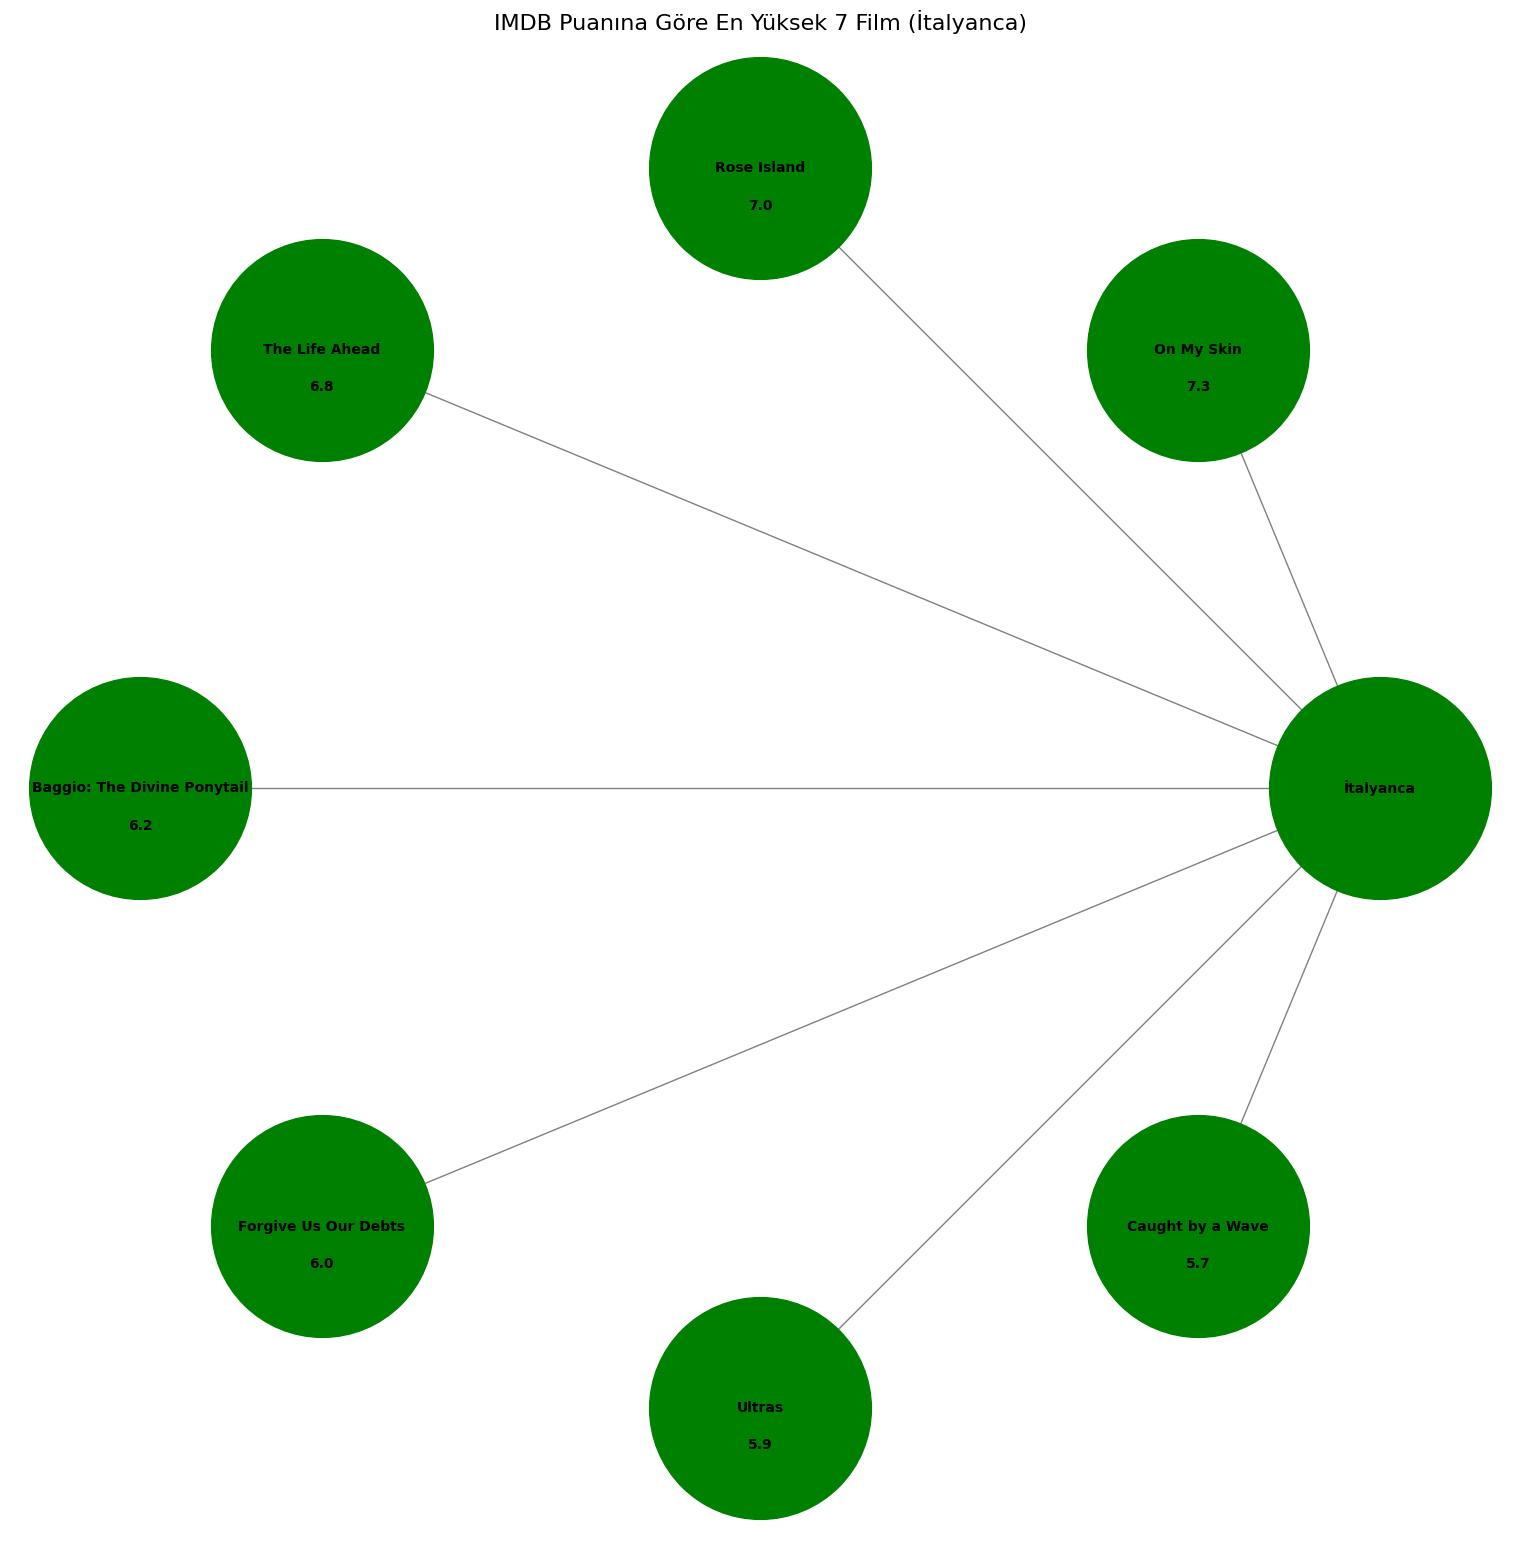

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# NetflixOriginals.csv dosyasını Latin1 encoding ile oku
data = pd.read_csv('NetflixOriginals.csv', encoding='Latin1')

# Aynı dilde olan filmleri seçin
same_language_films = data[data['Language'].str.contains('Italian')]

# IMDb puanına göre sıralayın
same_language_films_sorted = same_language_films.sort_values(by='IMDB Score', ascending=False)

# En yüksek 7 filmi seçin
top_7_films = same_language_films_sorted.head(7)

# Boş bir graf oluştur
G = nx.Graph()

# 'İngilizce' düğümünü ekle
G.add_node('İtalyanca')

# Her bir film için bir düğüm ekle
for _, film in top_7_films.iterrows():
    G.add_node(film['Title'])

    # 'İngilizce' düğümü ile film düğümü arasına kenar ekle
    G.add_edge('İtalyanca', film['Title'])

    # IMDb puanını film isminin altına yazdır
    G.nodes[film['Title']]['IMDB Score'] = film['IMDB Score']

# Grafı çizdir
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)  # Düğümleri düzenle
nx.draw(G, pos, with_labels=True, node_color='green', node_size=25500, font_size=10, font_weight='bold', edge_color='gray', width=1.0)

# IMDb puanlarını düğümlerin altına yazdır
node_labels = nx.get_node_attributes(G, 'IMDB Score')
label_pos = {k: (pos[k][0], pos[k][1] - 0.06) for k in pos}
nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=10, font_color='black', font_weight='bold')

plt.title('IMDB Puanına Göre En Yüksek 7 Film (İtalyanca)', fontsize=16)
plt.axis('off')
plt.show()


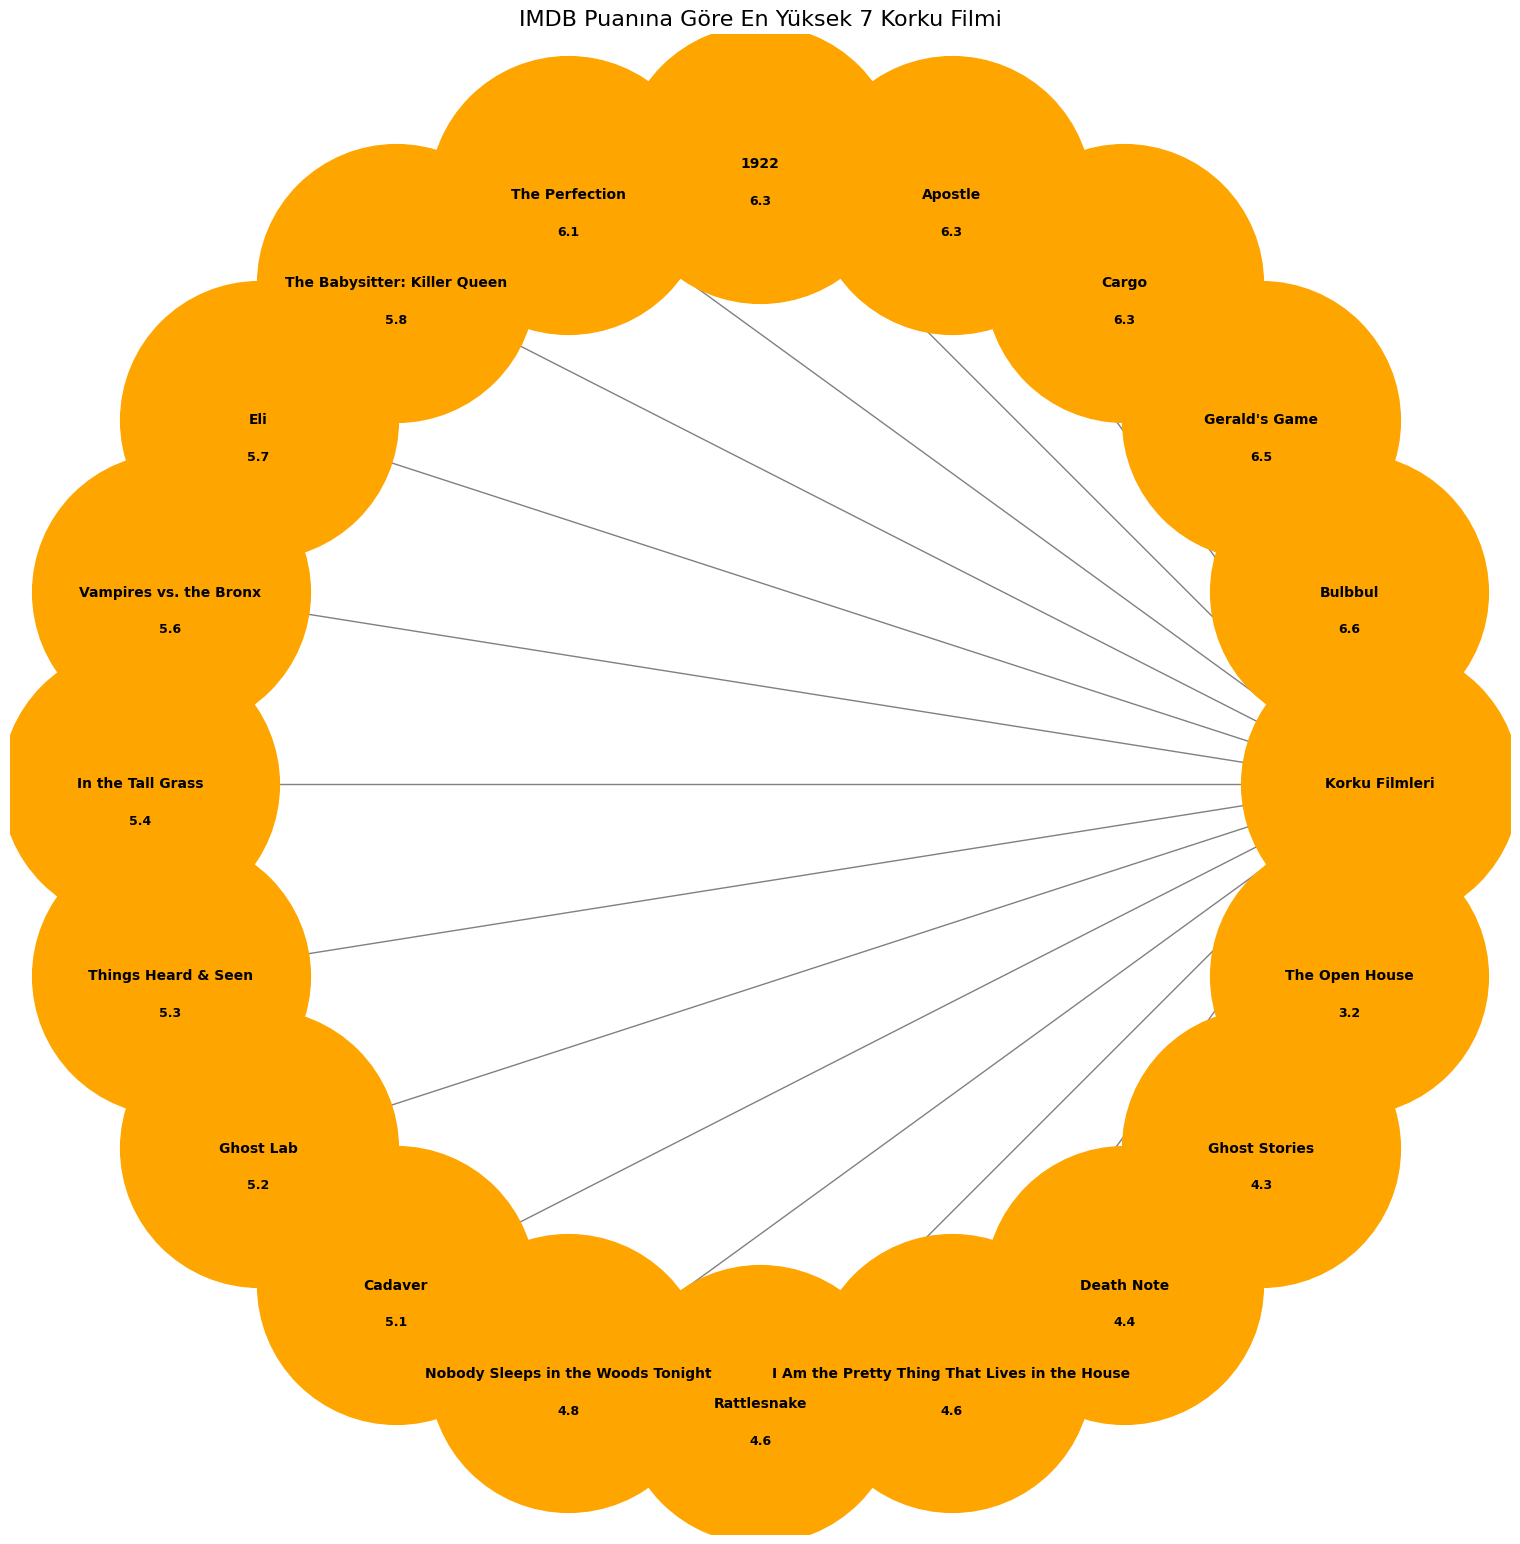

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# NetflixOriginals.csv dosyasını Latin1 encoding ile oku
data = pd.read_csv('NetflixOriginals.csv', encoding='Latin1')

# Sadece "horror" (korku) türünde olan filmleri seçin
horror_films = data[data['Genre'].str.contains('Horror')]

# IMDb puanına göre sıralayın
horror_films_sorted = horror_films.sort_values(by='IMDB Score', ascending=False)

# En yüksek 7 filmi seçin
top_7_horror_films = horror_films_sorted.head(30)

# Boş bir graf oluştur
G = nx.Graph()

# 'Korku Filmleri' düğümünü ekle
G.add_node('Korku Filmleri')

# Her bir film için bir düğüm ekle
for _, film in top_7_horror_films.iterrows():
    G.add_node(film['Title'])

    # 'Korku Filmleri' düğümü ile film düğümü arasına kenar ekle
    G.add_edge('Korku Filmleri', film['Title'])

    # IMDb puanını film isminin altına yazdır
    G.nodes[film['Title']]['IMDB Score'] = film['IMDB Score']

# Grafı çizdir
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)  # Düğümleri düzenle
nx.draw(G, pos, with_labels=True, node_color='orange', node_size=40000, font_size=10, font_weight='bold', edge_color='gray', width=1.0)

# IMDb puanlarını düğümlerin altına yazdır
node_labels = nx.get_node_attributes(G, 'IMDB Score')
label_pos = {k: (pos[k][0], pos[k][1] - 0.06) for k in pos}
nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=9, font_color='black', font_weight='bold')

plt.title('IMDB Puanına Göre En Yüksek 7 Korku Filmi', fontsize=16)
plt.axis('off')
plt.show()


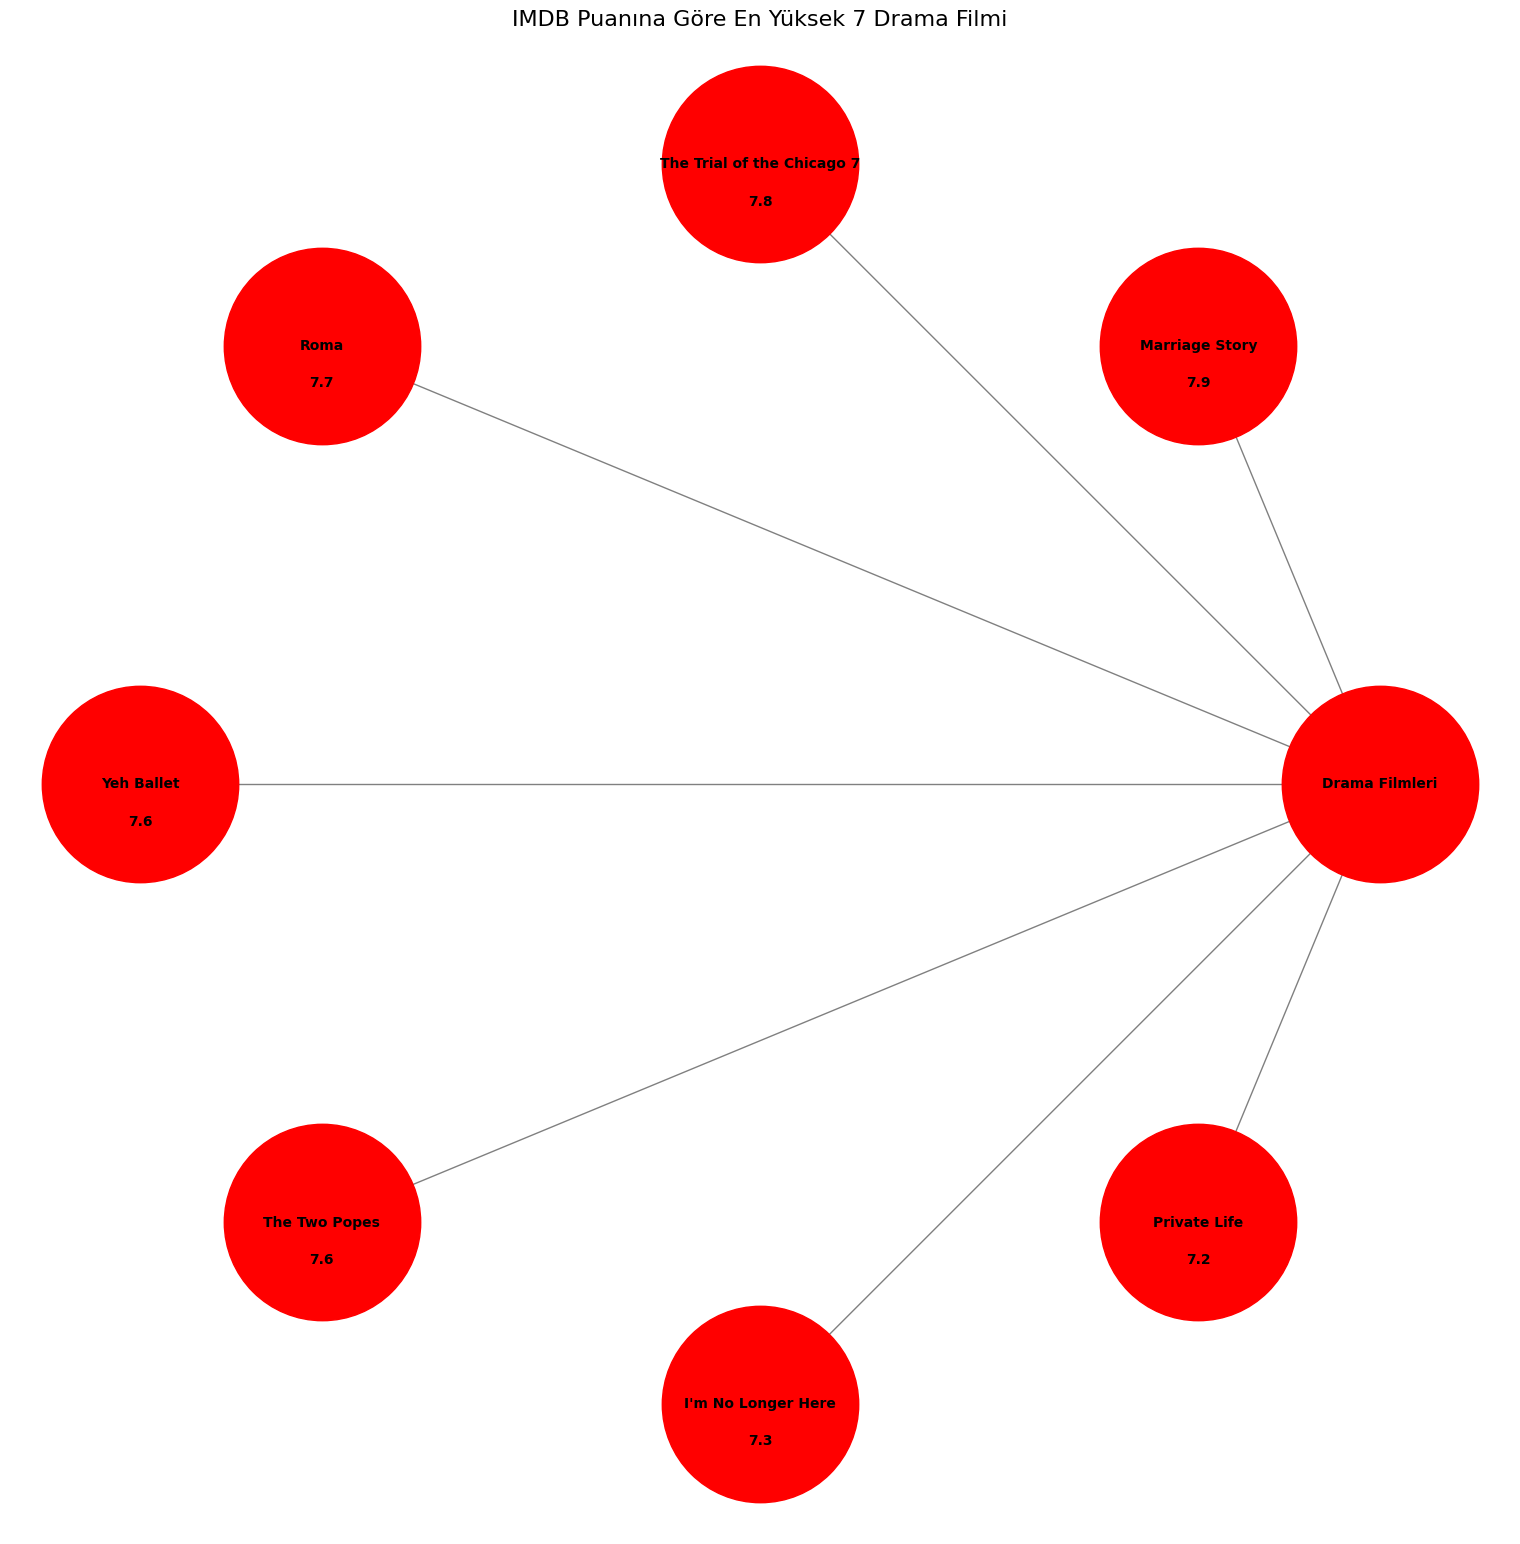

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# NetflixOriginals.csv dosyasını Latin1 encoding ile oku
data = pd.read_csv('NetflixOriginals.csv', encoding='Latin1')

# Sadece "drama" (dram) türünde olan filmleri seçin
drama_films = data[data['Genre'].str.contains('Drama')]

# IMDb puanına göre sıralayın
drama_films_sorted = drama_films.sort_values(by='IMDB Score', ascending=False)

# En yüksek 7 filmi seçin
top_7_drama_films = drama_films_sorted.head(7)

# Boş bir graf oluştur
G = nx.Graph()

# 'Drama Filmleri' düğümünü ekle
G.add_node('Drama Filmleri')

# Her bir film için bir düğüm ekle
for _, film in top_7_drama_films.iterrows():
    G.add_node(film['Title'])

    # 'Drama Filmleri' düğümü ile film düğümü arasına kenar ekle
    G.add_edge('Drama Filmleri', film['Title'])

    # IMDb puanını film isminin altına yazdır
    G.nodes[film['Title']]['IMDB Score'] = film['IMDB Score']

# Grafı çizdir
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)  # Düğümleri düzenle
nx.draw(G, pos, with_labels=True, node_color='red', node_size=20000, font_size=10, font_weight='bold', edge_color='gray', width=1.0)

# IMDb puanlarını düğümlerin altına yazdır
node_labels = nx.get_node_attributes(G, 'IMDB Score')
label_pos = {k: (pos[k][0], pos[k][1] - 0.06) for k in pos}
nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=10, font_color='black', font_weight='bold')

plt.title('IMDB Puanına Göre En Yüksek 7 Drama Filmi', fontsize=16)
plt.axis('off')
plt.show()


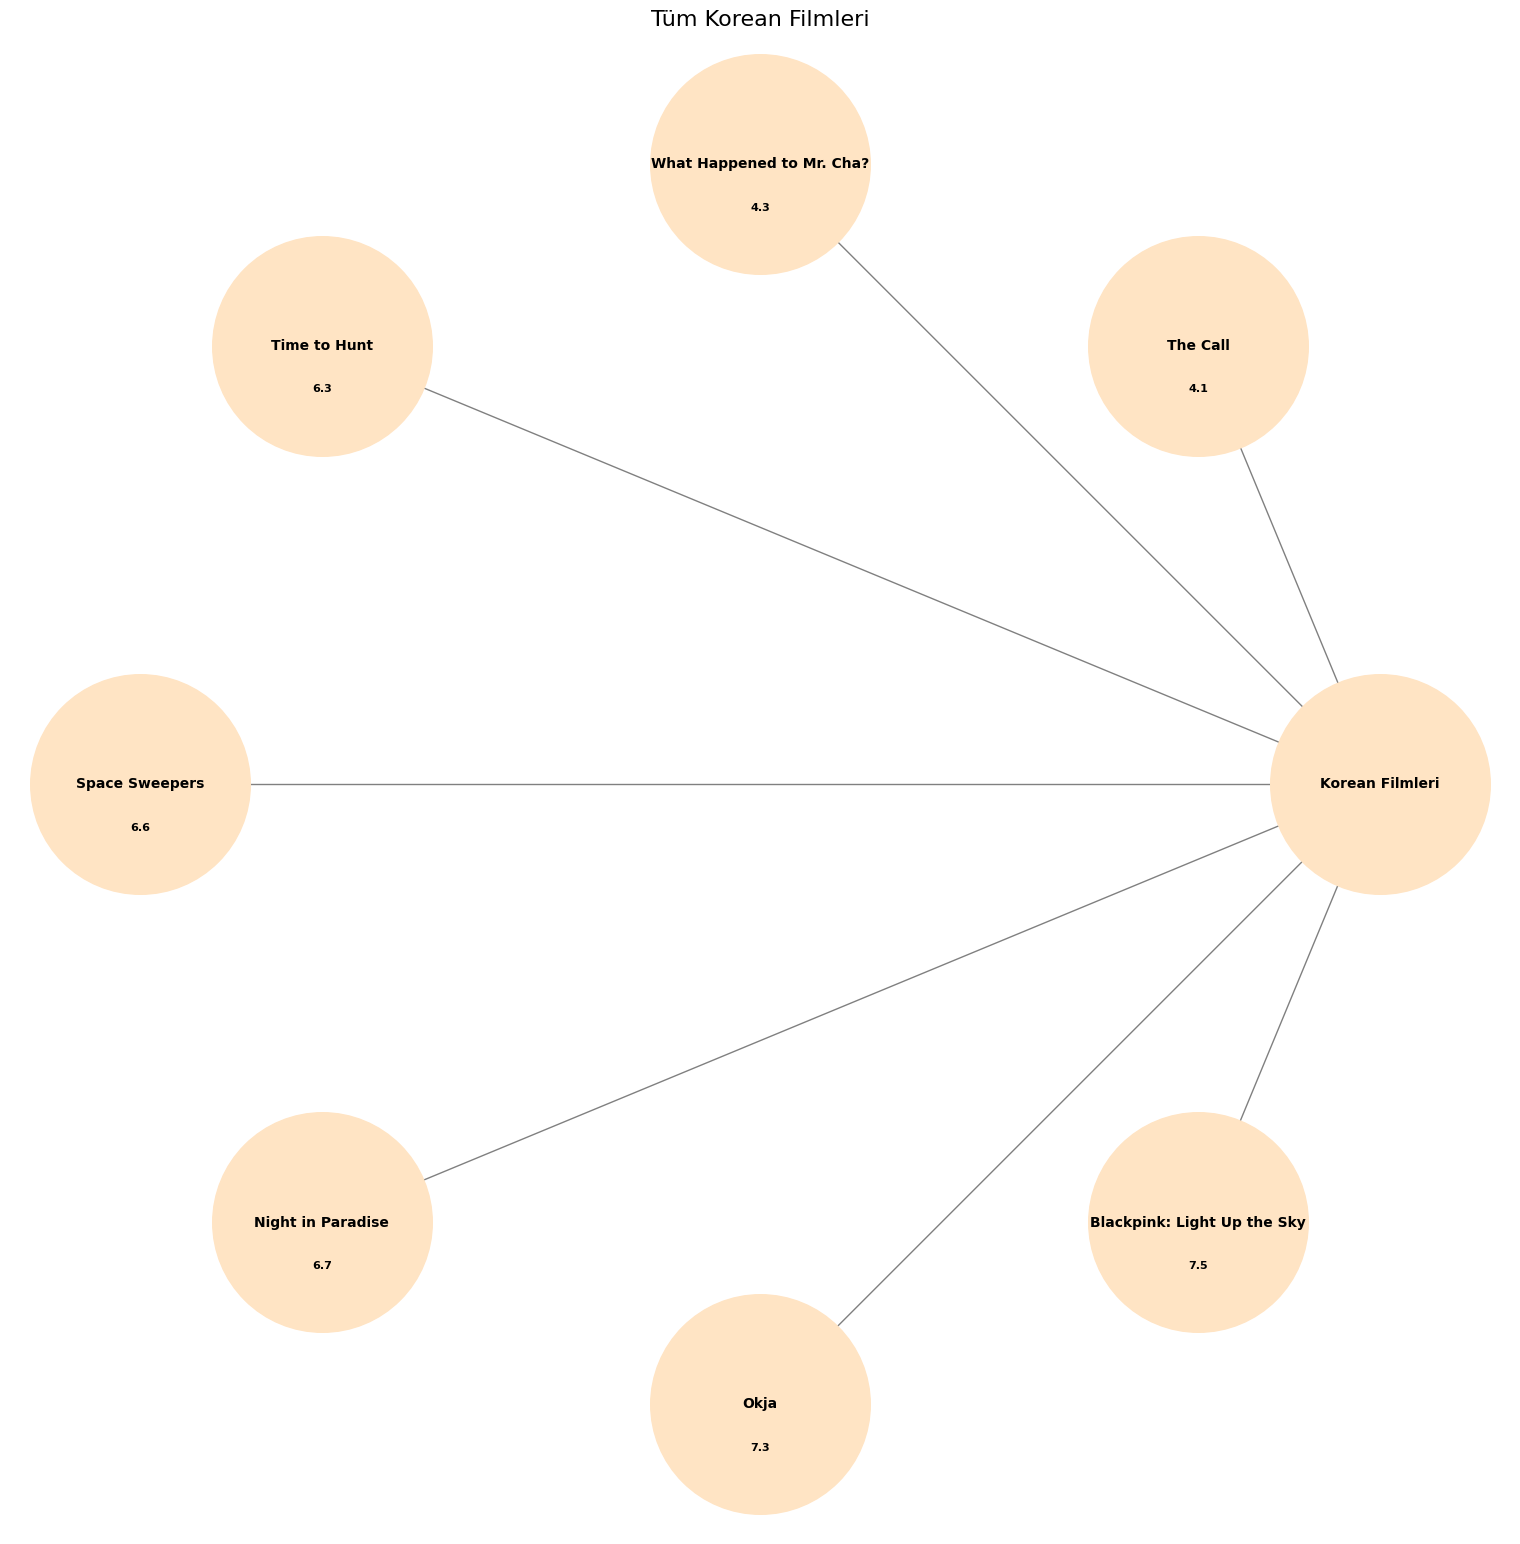

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# NetflixOriginals.csv dosyasını Latin1 encoding ile oku
data = pd.read_csv('NetflixOriginals.csv', encoding='Latin1')

# Sadece "Korean" (Korece) dilinde olan filmleri seçin
korean_films = data[data['Language'].str.contains('Korean')]

# Boş bir graf oluştur
G = nx.Graph()

# 'Korean Filmleri' düğümünü ekle
G.add_node('Korean Filmleri')

# Her bir film için bir düğüm ekle
for _, film in korean_films.iterrows():
    G.add_node(film['Title'])

    # 'Korean Filmleri' düğümü ile film düğümü arasına kenar ekle
    G.add_edge('Korean Filmleri', film['Title'])

    # IMDb puanını film isminin altına yazdır
    G.nodes[film['Title']]['IMDB Score'] = film['IMDB Score']

# Grafı çizdir
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)  # Düğümleri düzenle
nx.draw(G, pos, with_labels=True, node_color='bisque', node_size=25000, font_size=10, font_weight='bold', edge_color='gray', width=1.0)

# IMDb puanlarını düğümlerin altına yazdır
node_labels = nx.get_node_attributes(G, 'IMDB Score')
label_pos = {k: (pos[k][0], pos[k][1] - 0.07) for k in pos}
nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=8, font_color='black', font_weight='bold')

plt.title('Tüm Korean Filmleri', fontsize=16)
plt.axis('off')
plt.show()


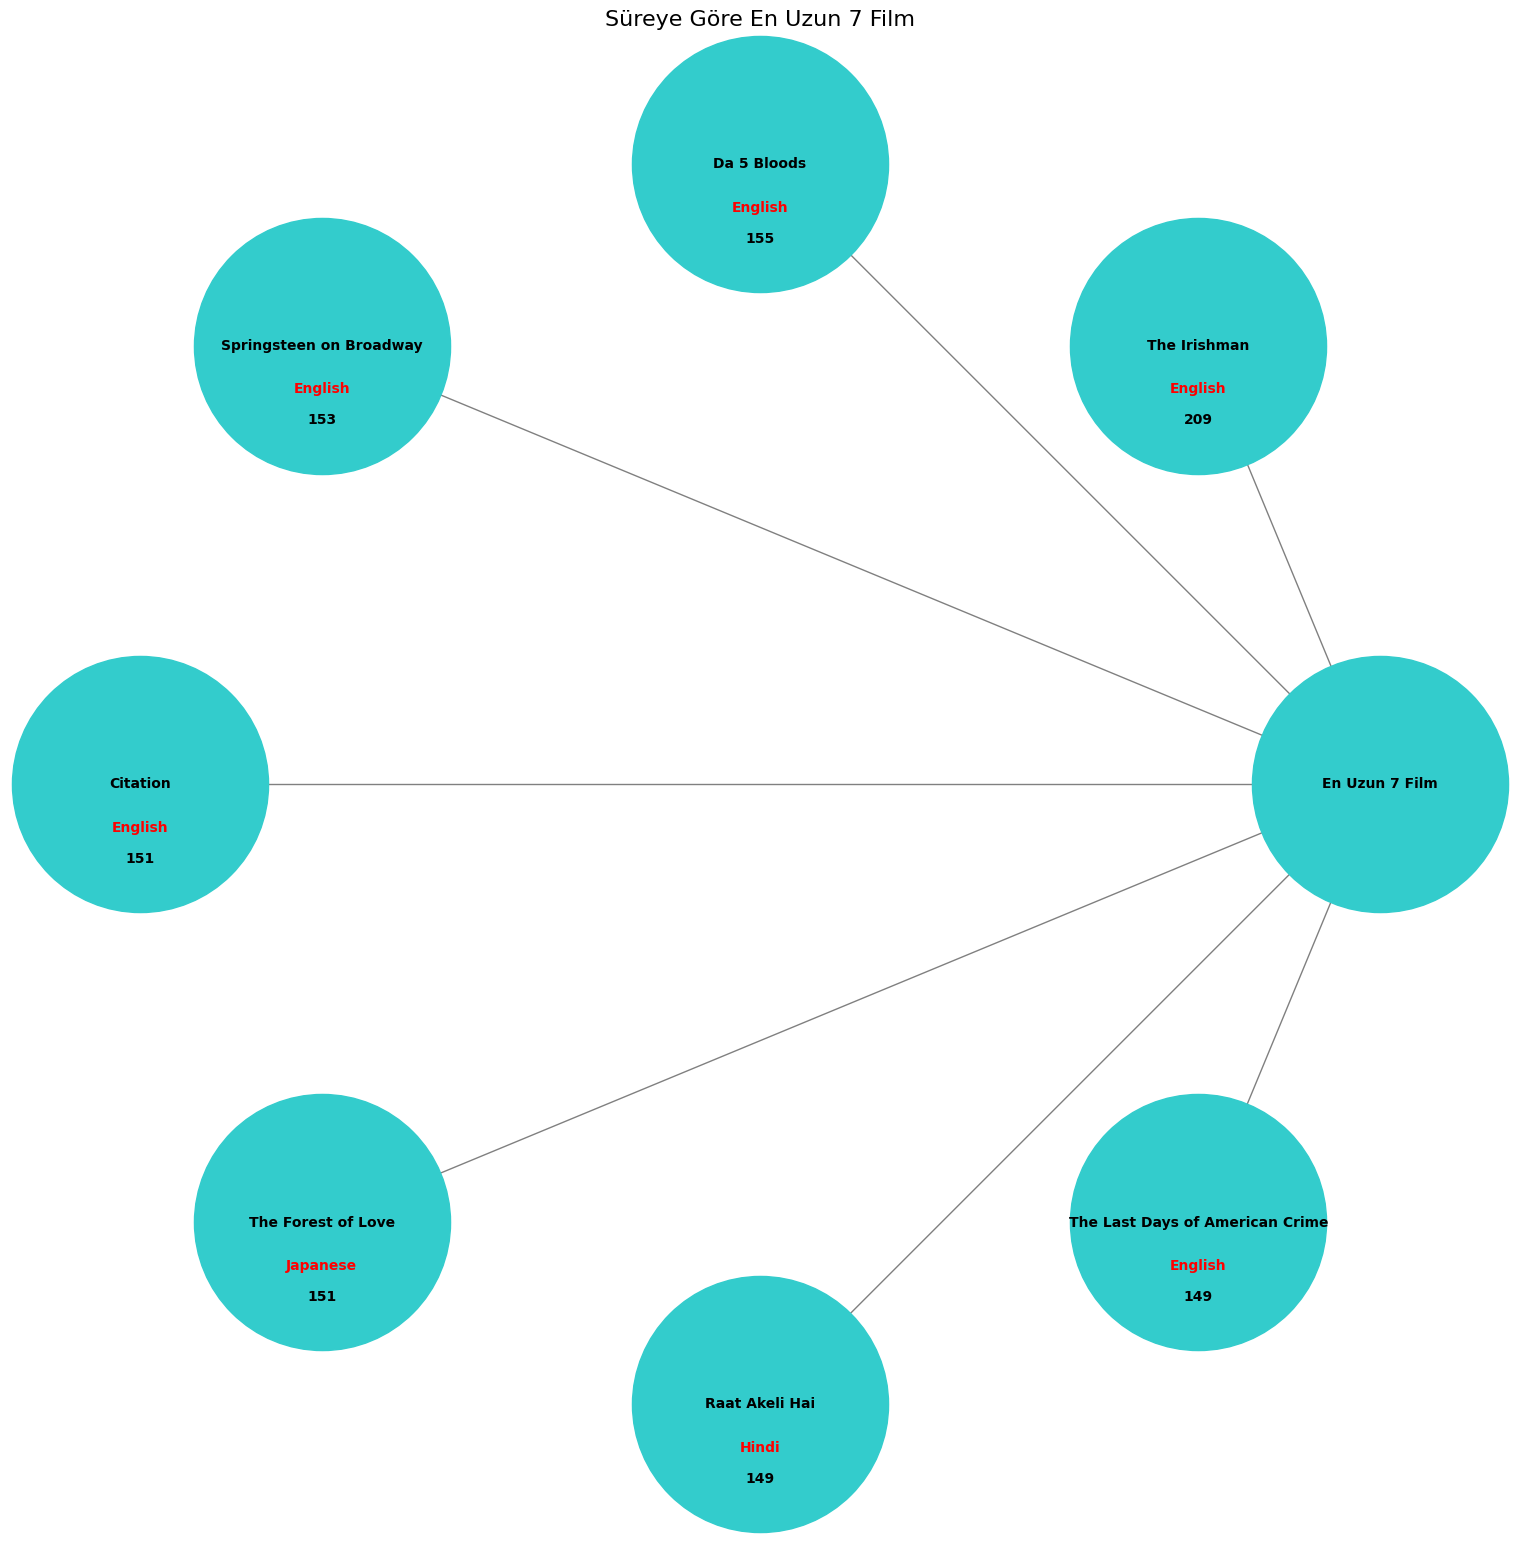

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# NetflixOriginals.csv dosyasını Latin1 encoding ile oku
data = pd.read_csv('NetflixOriginals.csv', encoding='Latin1')

# Süreye göre sırala
sorted_data = data.sort_values(by='Runtime', ascending=False)

# En yüksek 7 filmi seç
top_7_films = sorted_data.head(7)

# Boş bir graf oluştur
G = nx.Graph()

# 'En Uzun 7 Film' düğümünü ekle
G.add_node('En Uzun 7 Film')

# Her bir film için bir düğüm ekle
for _, film in top_7_films.iterrows():
    G.add_node(film['Title'])

    # 'En Uzun 7 Film' düğümü ile film düğümü arasına kenar ekle
    G.add_edge('En Uzun 7 Film', film['Title'])

    # Süreyi film isminin altına yazdır
    G.nodes[film['Title']]['Runtime'] = film['Runtime']

    # Dil bilgisini de film isminin altına yazdır
    G.nodes[film['Title']]['Language'] = film['Language']

# Grafı çizdir
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)  # Düğümleri düzenle
nx.draw(G, pos, with_labels=True, node_color='#33CCCC', node_size=34000, font_size=10, font_weight='bold', edge_color='gray', width=1.0)

# Süreleri ve dilleri düğümlerin altına yazdır
node_labels = nx.get_node_attributes(G, 'Runtime')
node_labels_lang = nx.get_node_attributes(G, 'Language')
label_pos = {k: (pos[k][0], pos[k][1] - 0.12) for k in pos}
label_p = {k: (pos[k][0], pos[k][1] - 0.07) for k in pos}
nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=10, font_color='black', font_weight='bold')
nx.draw_networkx_labels(G, label_p, labels=node_labels_lang, font_size=10, font_color='red', font_weight='bold')

plt.title('Süreye Göre En Uzun 7 Film', fontsize=16)
plt.axis('off')
plt.show()


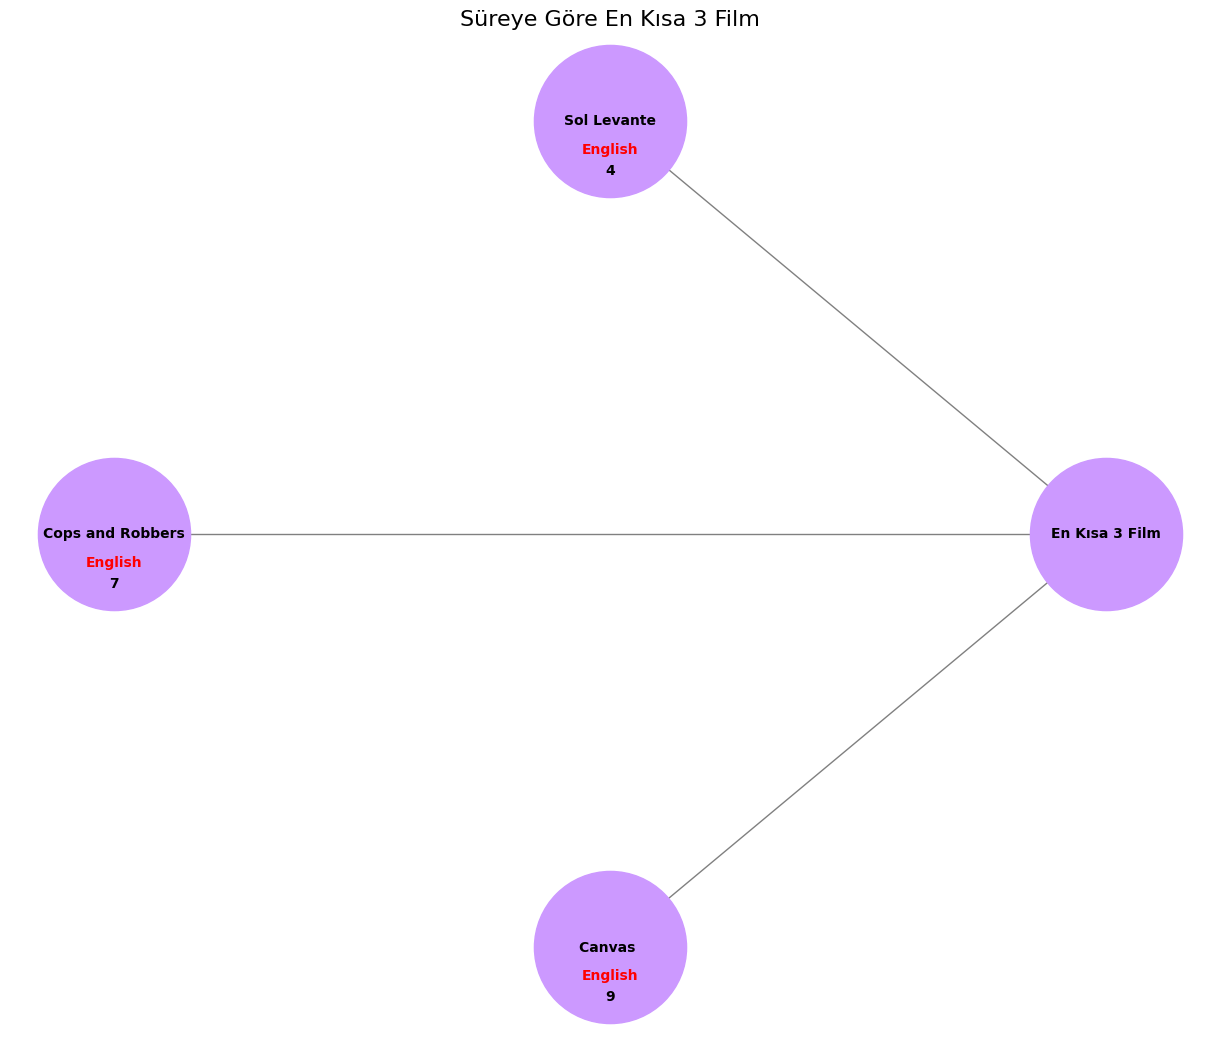

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# NetflixOriginals.csv dosyasını Latin1 encoding ile oku
data = pd.read_csv('NetflixOriginals.csv', encoding='Latin1')

# Süreye göre sırala
sorted_data = data.sort_values(by='Runtime')

# En kısa 3 filmi seç
top_3_films = sorted_data.head(3)

# Boş bir graf oluştur
G = nx.Graph()

# 'En Kısa 3 Film' düğümünü ekle
G.add_node('En Kısa 3 Film')

# Her bir film için bir düğüm ekle
for _, film in top_3_films.iterrows():
    G.add_node(film['Title'])

    # 'En Kısa 3 Film' düğümü ile film düğümü arasına kenar ekle
    G.add_edge('En Kısa 3 Film', film['Title'])

    # Süreyi film isminin altına yazdır
    G.nodes[film['Title']]['Runtime'] = film['Runtime']

    # Dil bilgisini de film isminin altına yazdır
    G.nodes[film['Title']]['Language'] = film['Language']

# Grafı çizdir
plt.figure(figsize=(12, 10))
pos = nx.circular_layout(G)  # Düğümleri düzenle
nx.draw(G, pos, with_labels=True, node_color='#CC99FF', node_size=12000, font_size=10, font_weight='bold', edge_color='gray', width=1.0)

# Süreleri ve dilleri düğümlerin altına yazdır
node_labels = nx.get_node_attributes(G, 'Runtime')
node_labels_lang = nx.get_node_attributes(G, 'Language')
label_pos = {k: (pos[k][0], pos[k][1] - 0.12) for k in pos}
label_p = {k: (pos[k][0], pos[k][1] - 0.07) for k in pos}
nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=10, font_color='black', font_weight='bold')
nx.draw_networkx_labels(G, label_p, labels=node_labels_lang, font_size=10, font_color='red', font_weight='bold')

plt.title('Süreye Göre En Kısa 3 Film', fontsize=16)
plt.axis('off')
plt.show()


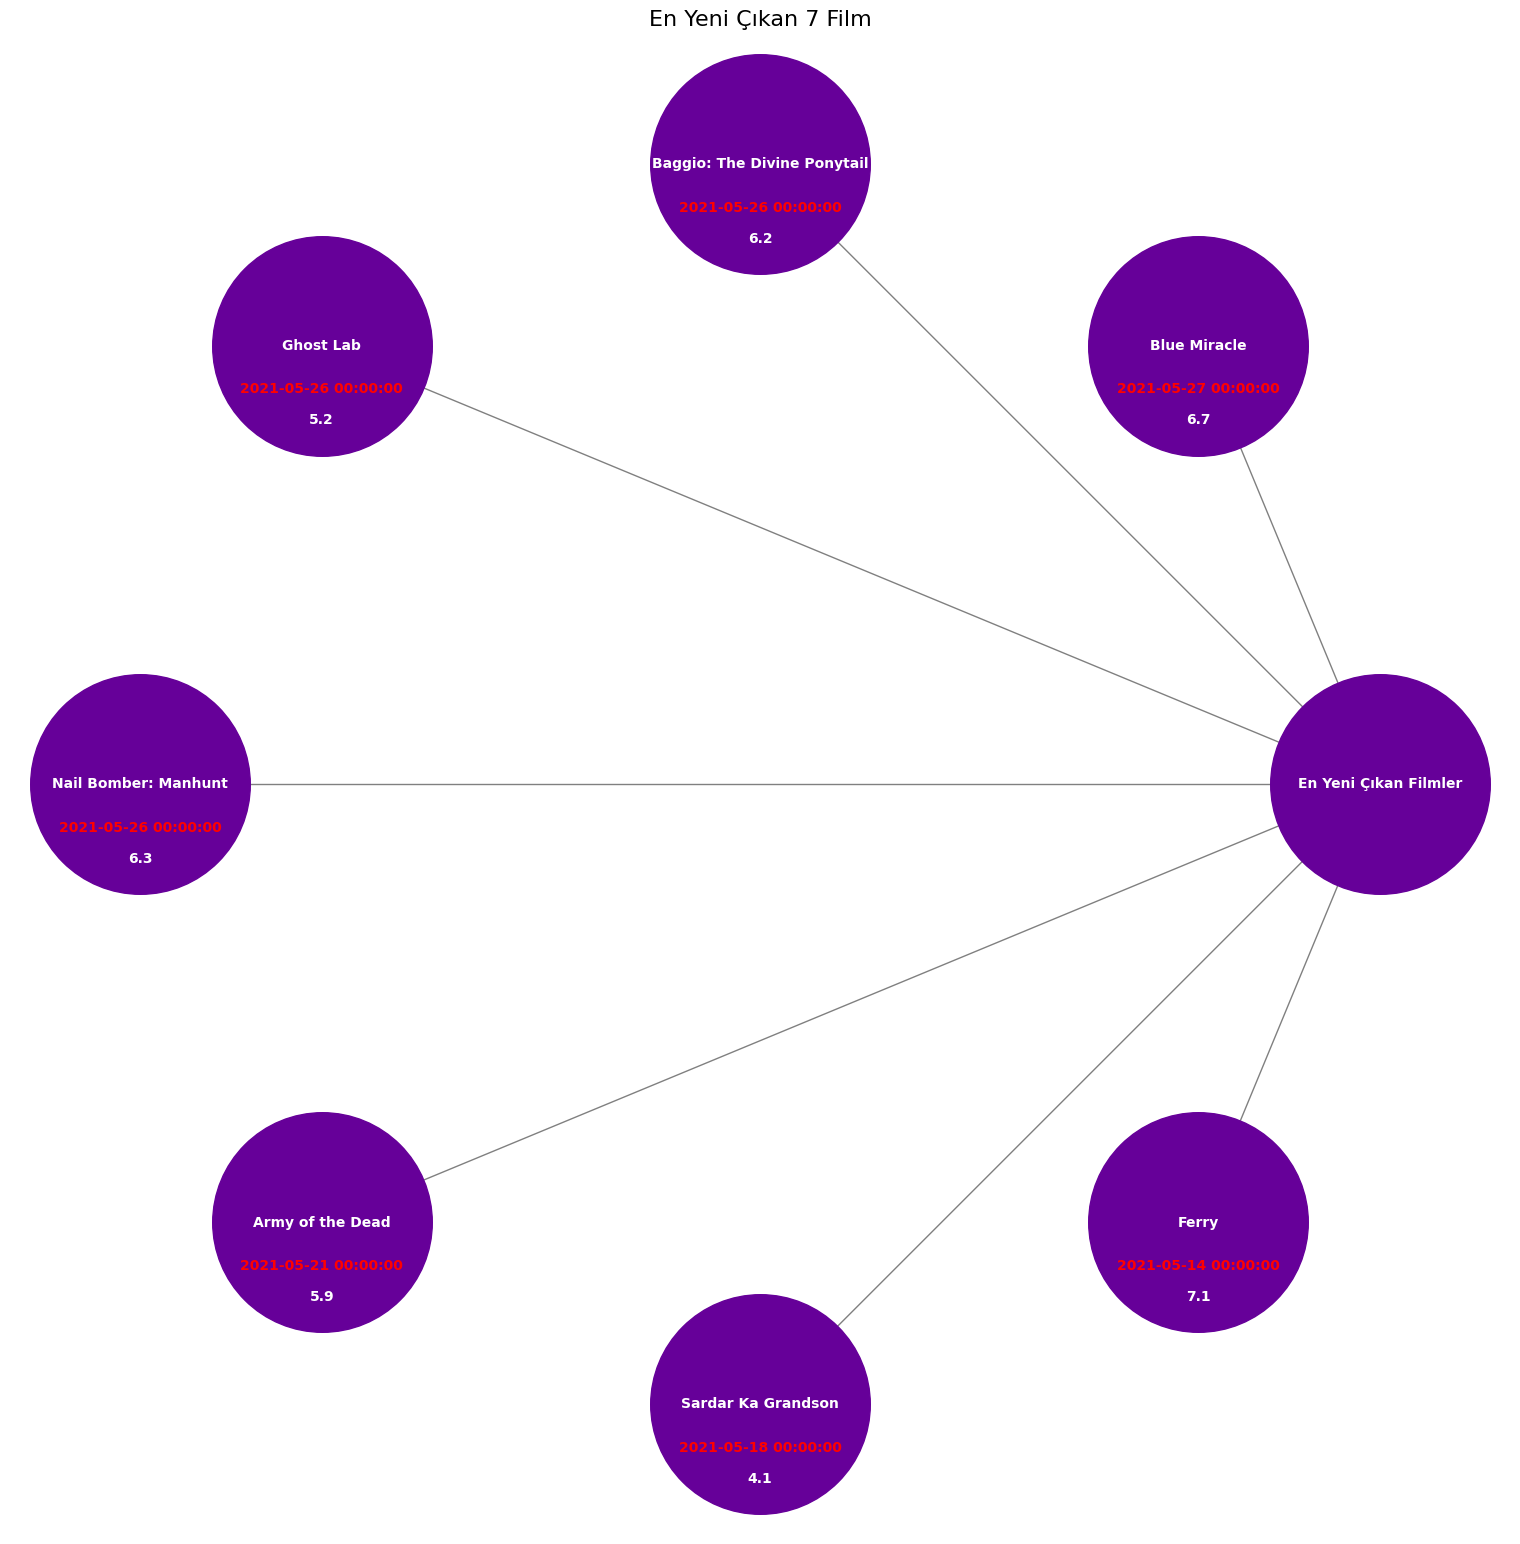

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# NetflixOriginals.csv dosyasını Latin1 encoding ile oku
data = pd.read_csv('NetflixOriginals.csv', encoding='Latin1')

# Premiere (Yayınlanma Tarihi) sütununu datetime türüne çevir
data['Premiere'] = pd.to_datetime(data['Premiere'], errors='coerce', format='%B %d, %Y')

# En yeni çıkan 7 filmi seç
newest_films = data.sort_values(by='Premiere', ascending=False).head(7)

# Boş bir graf oluştur
G = nx.Graph()

# 'En Yeni Çıkan Filmler' düğümünü ekle
G.add_node('En Yeni Çıkan Filmler')

# Her bir film için bir düğüm ekle
for _, film in newest_films.iterrows():
    G.add_node(film['Title'])

    # 'En Yeni Çıkan Filmler' düğümü ile film düğümü arasına kenar ekle
    G.add_edge('En Yeni Çıkan Filmler', film['Title'])

    # Premiere (Yayınlanma Tarihi) bilgisini de film isminin altına yazdır
    G.nodes[film['Title']]['Premiere'] = film['Premiere']

    # IMDb puanını film isminin altına yazdır
    G.nodes[film['Title']]['IMDB Score'] = film['IMDB Score']

# Grafı çizdir
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)  # Düğümleri düzenle
nx.draw(G, pos, with_labels=True, node_color='#660099', node_size=25000,font_color='white', font_size=10, font_weight='bold', edge_color='gray', width=1.0)

# Yayınlanma tarihlerini düğümlerin yanına yazdır
node_labels = nx.get_node_attributes(G, 'IMDB Score')
node_labels_lang = nx.get_node_attributes(G, 'Premiere')
label_pos = {k: (pos[k][0], pos[k][1] - 0.12) for k in pos}
label_p = {k: (pos[k][0], pos[k][1] - 0.07) for k in pos}
nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=10, font_color='white', font_weight='bold')
nx.draw_networkx_labels(G, label_p, labels=node_labels_lang, font_size=10, font_color='red', font_weight='bold')

plt.title('En Yeni Çıkan 7 Film', fontsize=16)
plt.axis('off')
plt.show()


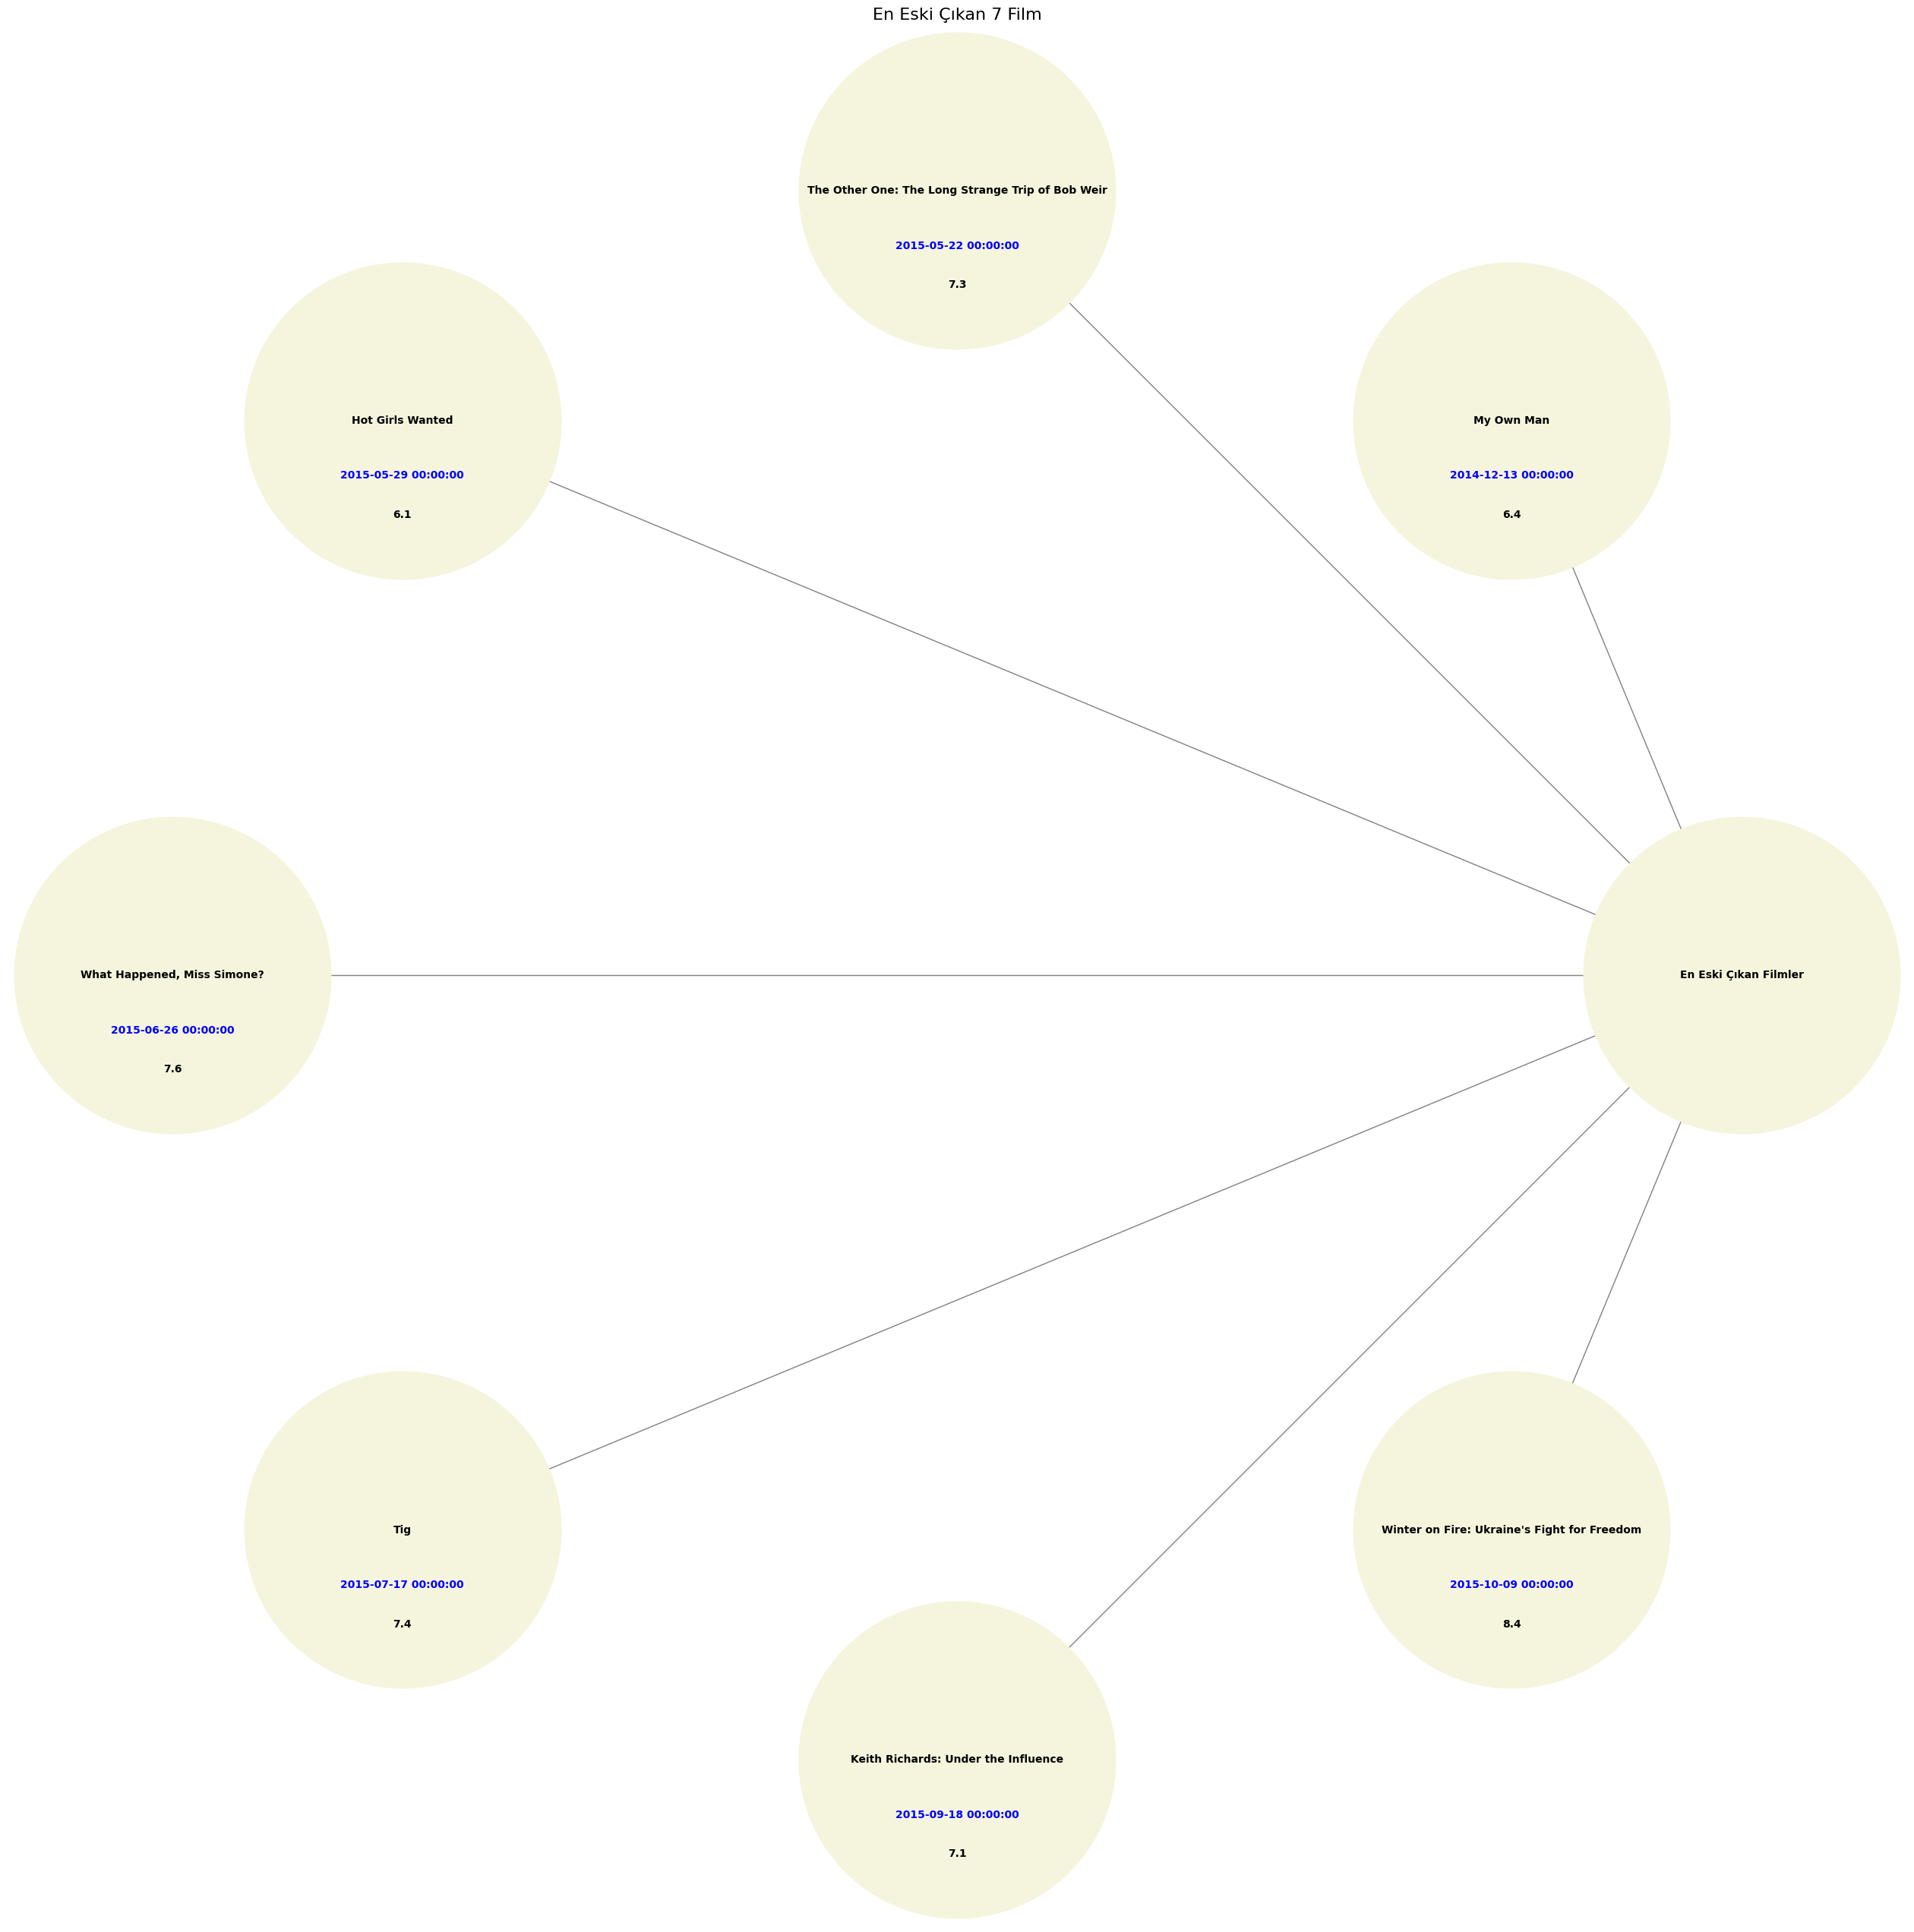

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# NetflixOriginals.csv dosyasını Latin1 encoding ile oku
data = pd.read_csv('NetflixOriginals.csv', encoding='Latin1')

# Premiere (Yayınlanma Tarihi) sütununu datetime türüne çevir
data['Premiere'] = pd.to_datetime(data['Premiere'], errors='coerce', format='%B %d, %Y')

# En eski çıkan 7 filmi seç
oldest_films = data.sort_values(by='Premiere').head(7)

# Boş bir graf oluştur
G = nx.Graph()

# 'En Eski Çıkan Filmler' düğümünü ekle
G.add_node('En Eski Çıkan Filmler')

# Her bir film için bir düğüm ekle
for _, film in oldest_films.iterrows():
    G.add_node(film['Title'])

    # 'En Eski Çıkan Filmler' düğümü ile film düğümü arasına kenar ekle
    G.add_edge('En Eski Çıkan Filmler', film['Title'])

    # Premiere (Yayınlanma Tarihi) bilgisini de film isminin altına yazdır
    G.nodes[film['Title']]['Premiere'] = film['Premiere']

    # IMDb puanını film isminin altına yazdır
    G.nodes[film['Title']]['IMDB Score'] = film['IMDB Score']

# Grafı çizdir
plt.figure(figsize=(25, 25))
pos = nx.circular_layout(G)  # Düğümleri düzenle
nx.draw(G, pos, with_labels=True, node_color='#F5F5DD', node_size=90000, font_size=10, font_weight='bold', edge_color='gray', width=1.0)

# Yayınlanma tarihlerini düğümlerin yanına yazdır
node_labels = nx.get_node_attributes(G, 'IMDB Score')
node_labels_lang = nx.get_node_attributes(G, 'Premiere')
label_pos = {k: (pos[k][0], pos[k][1] - 0.12) for k in pos}
label_p = {k: (pos[k][0], pos[k][1] - 0.07) for k in pos}
nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=10, font_color='black', font_weight='bold')
nx.draw_networkx_labels(G, label_p, labels=node_labels_lang, font_size=10, font_color='blue', font_weight='bold')

plt.title('En Eski Çıkan 7 Film', fontsize=16)
plt.axis('off')
plt.show()
